## Cauchy Distribution Source Comparisons
Compare different ways to compute the Cauchy Distribution
1. Simulated from Monte Carlo
2. Analyticially per wikipedia
3. scipy.stats (testing the "scale" argument)

In [3]:
import numpy as np
import pandas as pd
import scipy.stats
import altair as alt

In [4]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

__Setup__
<br>Arguments used across functions 

In [60]:
dist_from_xaxis = 10
n_samples_for_sim = 50

__Function to simulate__
<br>Simulation based on interpretation of rays emanating from point source onto x axis
<br>Compare to analytical descriptions as sample size decreases.

In [69]:
def cauchy_cdf_sim(y, n = 5000, x0 = 0):
    ### np.random.uniform samples [low,high), so need to make low exclusive
    if y == 0:
        y += 1e-8
    if y > 0:
        y *= -1
    interval_min = 1e-16
    interval_max = np.pi
    angles = np.random.uniform(size = n, low = interval_min, high = interval_max)
    intersects = np.sort(np.abs(y) / np.tan(angles))
    cdf_df = pd.DataFrame({"intersects": intersects,
                           "simulated_cdf": np.arange(intersects.size) / intersects.size})
    return cdf_df

In [70]:
simulated_cdf = cauchy_cdf_sim(y = dist_from_xaxis, n = n_samples_for_sim)
simulated_cdf.head()

,intersects,simulated_cdf
0,-410.274857,0.00
1,-250.714914,0.02
2,-95.276891,0.04
3,-69.733804,0.06
4,-57.303321,0.08


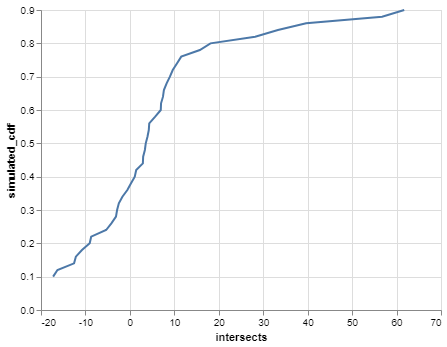

In [71]:
simulated_cdf = simulated_cdf.loc[(simulated_cdf['simulated_cdf'] >= 0.1) & (simulated_cdf['simulated_cdf'] <= 0.9)]
alt.Chart(simulated_cdf).mark_line().encode(
    x='intersects',
    y='simulated_cdf'
)

__Analytical cdf__
<br>https://en.wikipedia.org/wiki/Cauchy_distribution

In [72]:
def cauchy_cdf(x, y = 1, x0 = 0):
    return 1 / np.pi * np.arctan((x - x0) / y) + 0.5 
simulated_cdf.loc[:,'analytical_cdf'] = cauchy_cdf(x = simulated_cdf.loc[:, 'intersects'], y = dist_from_xaxis)

__Scipy cdf__
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html

In [73]:
simulated_cdf.loc[:,'scipy_cdf'] = scipy.stats.cauchy.cdf(x = simulated_cdf.loc[:, 'intersects'], scale = dist_from_xaxis)

simulated_cdf.head()

,intersects,simulated_cdf,analytical_cdf,scipy_cdf
5,-17.272681,0.10,0.167048,0.167048
6,-16.295129,0.12,0.175203,0.175203
7,-12.559935,0.14,0.214034,0.214034
8,-12.157359,0.16,0.219105,0.219105
9,-10.782950,0.18,0.238014,0.238014


__Melt for plotting__

In [74]:
melted_cdf = pd.melt(simulated_cdf, id_vars = "intersects")
while melted_cdf.shape[0] > 5000:
    melted_cdf = melted_cdf.iloc[np.arange(melted_cdf.shape[0] / 2) * 2]
melted_cdf.head()

,intersects,variable,value
0,-17.272681,simulated_cdf,0.10
1,-16.295129,simulated_cdf,0.12
2,-12.559935,simulated_cdf,0.14
3,-12.157359,simulated_cdf,0.16
4,-10.782950,simulated_cdf,0.18


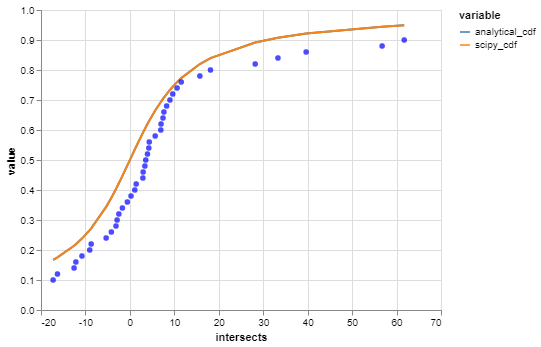

In [75]:
lines = (alt.Chart(melted_cdf.loc[melted_cdf['variable'] != 'simulated_cdf'])
         .mark_line().encode(
    x='intersects',
    y='value',
    color='variable'
))

points = (alt.Chart(melted_cdf.loc[melted_cdf['variable'] == 'simulated_cdf'])
          .mark_circle(color = "blue").encode(
    x='intersects',
    y='value'
))

lines + points